<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/BackupDataset/blob/main/EAPS_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning

##Part 1: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib  import pyplot as plt
from google.colab import drive


In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/Absenteeism_at_work_Project.csv')
df.head()


Mounted at /content/drive


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [4]:
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,"264,604",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,"264,604",...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,4,0.0,0.0,3,1,118.0,14.0,13.0,40.0,"271,219",...,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,8,0.0,0.0,4,2,231.0,35.0,14.0,39.0,"271,219",...,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
739,35,0.0,0.0,6,3,179.0,45.0,14.0,53.0,"271,219",...,0.0,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0


In [9]:
df.shape


(740, 21)

In [8]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [10]:
df.isna().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [27]:
# Replace missing values with the mean of each column
df.fillna(df.mean().round(0), inplace=True)
# Clean the "Work load Average/day" column by removing commas and converting to numeric
df["Work load Average/day "] = df["Work load Average/day "].str.replace(',', '').astype(float)

<ipython-input-27-507429b6edba>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean().round(0), inplace=True)


In [30]:
df.duplicated(keep="first").sum()

27

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               713 non-null    int64  
 1   Reason for absence               713 non-null    float64
 2   Month of absence                 713 non-null    float64
 3   Day of the week                  713 non-null    int64  
 4   Seasons                          713 non-null    int64  
 5   Transportation expense           713 non-null    float64
 6   Distance from Residence to Work  713 non-null    float64
 7   Service time                     713 non-null    float64
 8   Age                              713 non-null    float64
 9   Work load Average/day            703 non-null    float64
 10  Hit target                       713 non-null    float64
 11  Disciplinary failure             713 non-null    float64
 12  Education             

##Exploratory Data Analysis

In [39]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,713.00,713.00,713.00,713.00,713.00,713.00,713.00,713.00,713.00,703.00,...,713.00,713.00,713.00,713.00,713.00,713.00,713.00,713.00,713.00,713.00
mean,18.25,18.90,6.40,3.90,2.55,222.31,29.33,12.48,36.44,271901.95,...,0.05,1.29,1.05,0.56,0.08,0.77,79.02,172.22,26.66,7.16
std,10.95,8.44,3.42,1.42,1.12,67.22,14.72,4.37,6.54,39315.43,...,0.23,0.67,1.09,0.50,0.26,1.33,12.81,6.12,4.16,13.49
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205917.00,...,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,10.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244387.00,...,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264604.00,...,0.00,1.00,1.00,1.00,0.00,0.00,80.00,171.00,25.00,3.00
75%,28.00,26.00,10.00,5.00,4.00,260.00,49.00,16.00,40.00,294217.00,...,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378884.00,...,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00


In [40]:
for column in df.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Max: {df[column].max()}")
    print(f"Min: {df[column].min()}")

===============Column: ID==============
Number of unique values: 36
Max: 36
Min: 1
===============Column: Reason for absence==============
Number of unique values: 28
Max: 28.0
Min: 0.0
===============Column: Month of absence==============
Number of unique values: 13
Max: 12.0
Min: 0.0
===============Column: Day of the week==============
Number of unique values: 5
Max: 6
Min: 2
===============Column: Seasons==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Transportation expense==============
Number of unique values: 25
Max: 388.0
Min: 118.0
===============Column: Distance from Residence to Work==============
Number of unique values: 26
Max: 52.0
Min: 5.0
===============Column: Service time==============
Number of unique values: 18
Max: 29.0
Min: 1.0
===============Column: Age==============
Number of unique values: 22
Max: 58.0
Min: 27.0
===============Column: Work load Average/day ==============
Number of unique values: 38
Max: 378884.0
Min: 205917.0
=====

In [41]:
df['Absenteeism time in hours'].unique()

array([  4.,   0.,   2.,   7.,   8.,  40.,   1.,   3.,  32.,   5.,  16.,
        24.,  64.,  56.,  80., 120., 112., 104.,  48.])

In [42]:
bins = len(df['Absenteeism time in hours'].unique())
bins

19

In [ ]:
sns.histplot??

Number of hours absent per month

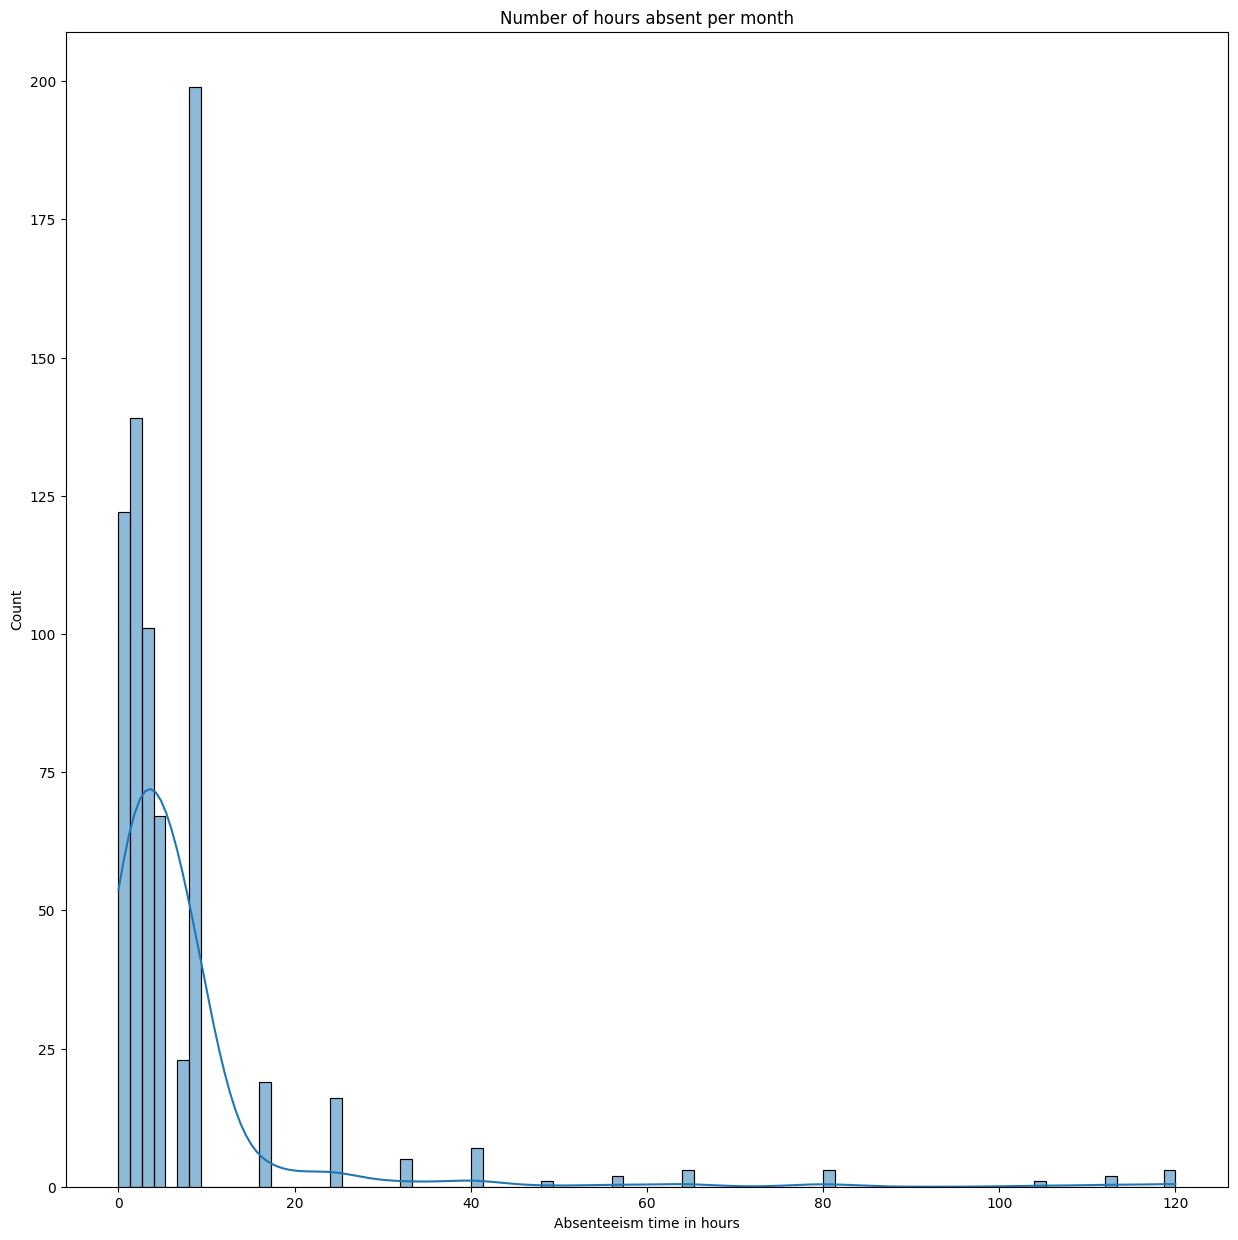

In [50]:
plt.figure(figsize=(15,15))
sns.histplot(data = df, x=df['Absenteeism time in hours'], kde=True)
plt.title("Number of hours absent per month")
plt.show()

In [44]:
df["Reason for absence"].value_counts()

23.00    146
28.00    106
13.00     55
27.00     49
19.00     43
0.00      43
22.00     37
26.00     33
25.00     31
11.00     26
10.00     25
18.00     21
14.00     19
1.00      16
7.00      15
6.00       8
12.00      8
21.00      6
8.00       6
9.00       4
5.00       3
16.00      3
24.00      3
15.00      2
4.00       2
3.00       1
2.00       1
17.00      1
Name: Reason for absence, dtype: int64

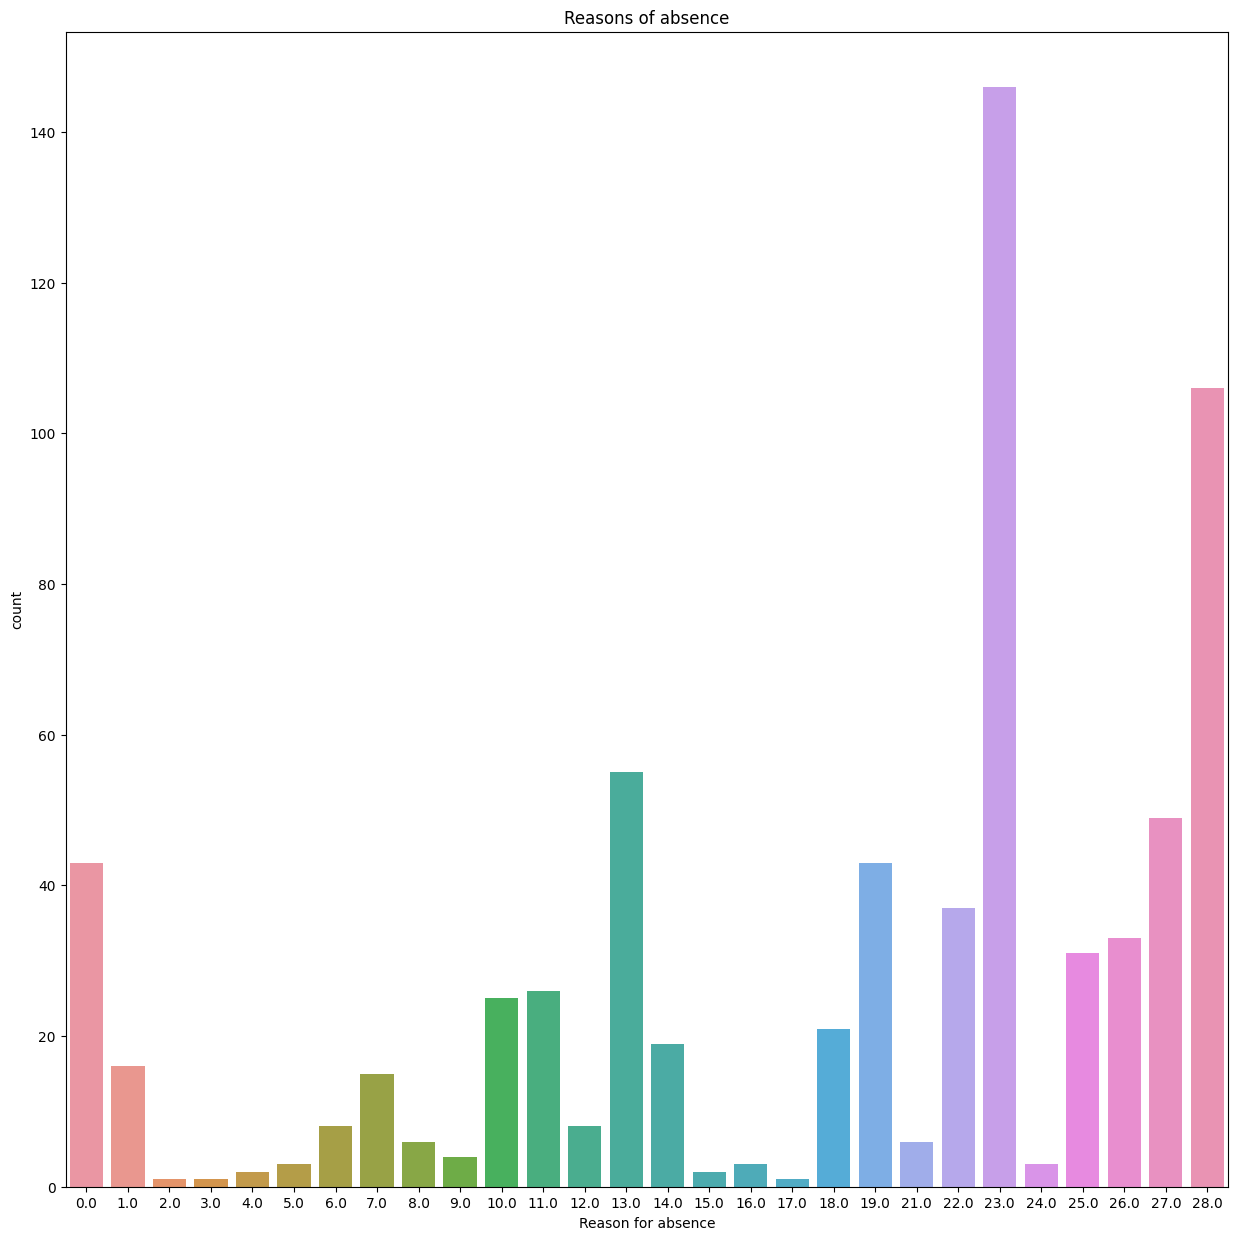

In [48]:
plt.figure(figsize=(15, 15))
sns.countplot(data=df, x="Reason for absence")
plt.title("Reasons of absence")
plt.show()

In [51]:
df["Son"].value_counts()

0.00    271
1.00    231
2.00    155
4.00     41
3.00     15
Name: Son, dtype: int64

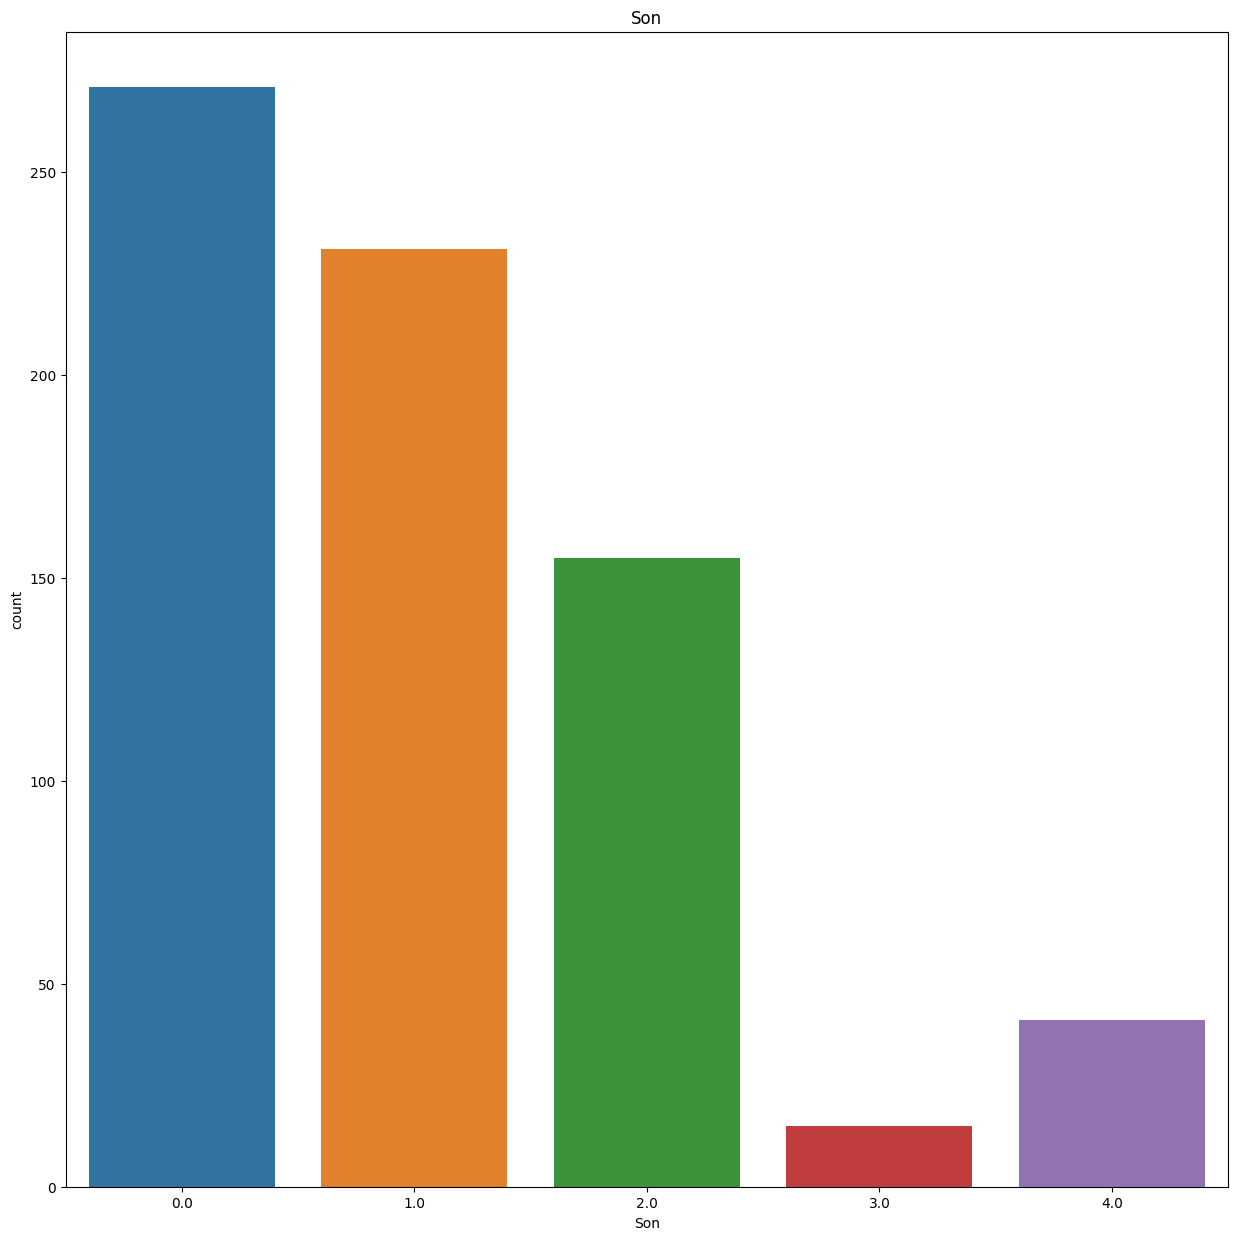

In [52]:
plt.figure(figsize=(15, 15))
sns.countplot(data=df, x="Son")
plt.title("Son")
plt.show()

In [53]:
df["Social drinker"].value_counts()

1.00    402
0.00    311
Name: Social drinker, dtype: int64

In [54]:
labels = df["Social drinker"].value_counts().index.tolist()
labels

[1.0, 0.0]

In [55]:
labels = ["Social drinker" if i == 1 else "Non social drinker" for i in labels]
labels

['Social drinker', 'Non social drinker']

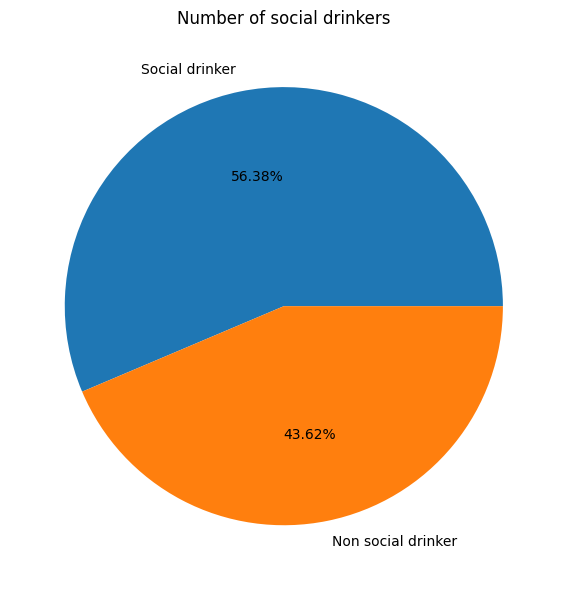

In [58]:
plt.figure(figsize=(6, 6))
plt.pie(x=df["Social drinker"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Number of social drinkers")
plt.tight_layout()
plt.show()

In [59]:
df["Social smoker"].value_counts()

0.00    659
1.00     54
Name: Social smoker, dtype: int64

In [60]:
labels = df["Social smoker"].value_counts().index.tolist()
labels

[0.0, 1.0]

In [61]:
labels = ["Social smoker" if i == 1 else "Non Social smoker" for i in labels]
labels

['Non Social smoker', 'Social smoker']

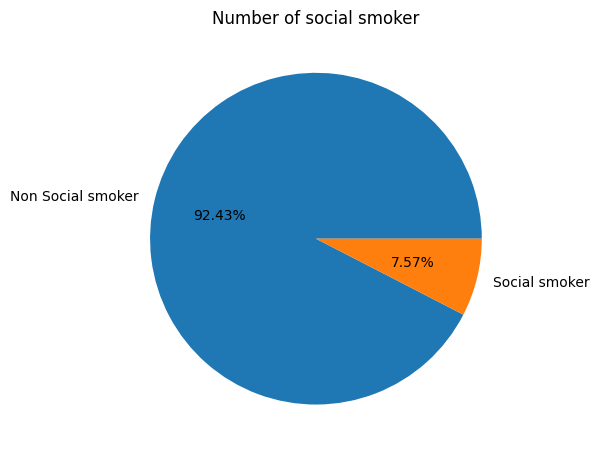

In [62]:
plt.figure(figsize=(6, 6))
plt.pie(x=df["Social smoker"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Number of social smoker")
plt.tight_layout()
plt.show()